<a href="https://colab.research.google.com/github/raphaelp-silva/deep_learning_pratico_com_tensorflow_e_python/blob/main/C%C3%B3pia_de_Projeto_1_Celsius_para_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema



- Equação para conversão: **T(°F) = T(°C) × 9/5 + 32**

# Etapa 1: Importação das bibliotecas

In [1]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [4]:
# importando a base de dados:
temperature_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True) # caso tenha um index ele será dropado, e o inplace modifica o arquivo diretamente no dataframe sem a necessidade da criacao de outra variavel.

In [5]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [6]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [7]:
temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [8]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [9]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 3: Visualização da base de dados

<Axes: xlabel='Celsius', ylabel='Fahrenheit'>

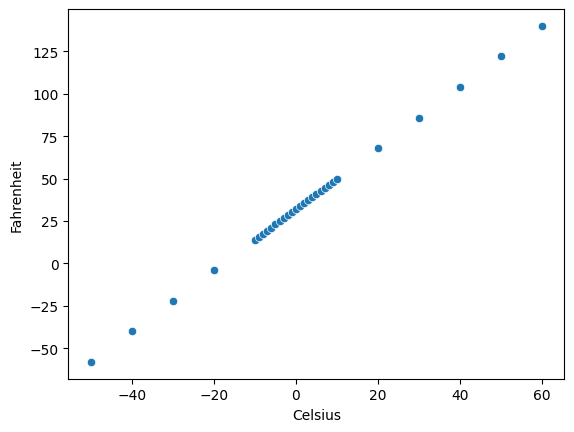

In [11]:
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit'])

# Etapa 4: Configuração da base de dados de treinamento

In [13]:
# Criando uma variavel para o eixo x (celsius) e o eixo y (fahrenheit)
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [14]:
X_train.shape

(30,)

In [15]:
y_train.shape

(30,)

# Etapa 5: Construção e treinamento do modelo

In [16]:
# Criando o modelo de rede neural:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compilando o modelo:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [27]:
# Realizando o treinamento:
epochs_hist = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step - loss: 2.2222e-11
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.5221
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1984
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.2618
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7565
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.8030
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3663
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0568
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.8080
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3801
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.1071
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4126
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0093
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1797
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5926
Epoch 16/500
1

# Etapa 5: Avaliação do modelo

In [28]:
# exibindo as chaves da variavel epochs_hist:
epochs_hist.history.keys()

dict_keys(['loss'])

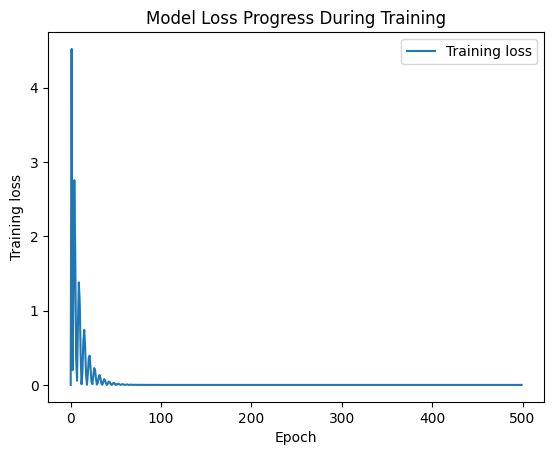

In [29]:
# plotando o gráfico de loss durante o treinamento:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [30]:
# encontrando os pesos das arestas do modelo em treinamento:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [40]:
# testando se o treinamento deu certo.
temp_c = 15
temp_f = model.predict(np.array([temp_c]))
temp_f

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[59.]], dtype=float32)

In [41]:
# confirmando o resultado utilizando a fórmula de conversao de celsiu para fahrenheit
temp_f1 = 9/5 * temp_c + 32
temp_f1

59.0